In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

name_files_dir = 'names'
dir_of_files = os.path.join(os.getcwd(), name_files_dir)

In [2]:
def cook_data(dir_of_files):
    datas = pd.DataFrame({})
    files = os.listdir(dir_of_files)
    
    for file in files:
         if file[-3:] == 'txt':
                piece_of_data = pd.read_csv(
                os.path.join(dir_of_files, file),
                names = ['name', 'sex', 'count', 'year'])
                piece_of_data['year'] = int(file[3:7])
                datas = pd.concat([datas, piece_of_data])
    return datas 

In [3]:
datas = cook_data(dir_of_files)

In [31]:
def count_dynamic_change_names_by_years(names, first_year, last_year):
    dynamic_change_names  = datas.loc[(datas['name'].isin(names)) & ((first_year <= datas['year']) & (datas['year'] <= last_year))][['year', 'count']].groupby(['year']).sum()
    if len(dynamic_change_names) != 0:
        dynamic_change_names.plot(grid=True) 
    else:
        print('Нет данных!')
        
def count_number_of_names_by_years(first_year, last_year):  
    dir_of_years = {}
    for year in range(first_year, last_year + 5, 5):
        dir_of_years[year] = [datas.loc[datas['year'] == year].shape[0]]
    number_of_names = pd.DataFrame(dir_of_years)      
    number_of_names.plot(kind='bar')

def count_top10__names_by_year(first_symbol, year):  
    number_of_names = datas.loc[(datas['year'] == year) & (datas['name'].str.startswith(first_symbol))]
    number_of_names = number_of_names[['name', 'count']].groupby(['name']).sum()
    number_of_names = number_of_names.sort_values(by='count', ascending=False)[:10]
    number_of_names.plot.pie(y='count')

def count_how_much_consonant(name):
    vowels = 'aeioyu'
    str_name = name.lower()
    
    count_of_consonant = 0
    for symbol in str_name:
        if vowels.find(symbol) == -1:
            count_of_consonant += 1
    
    return count_of_consonant
    
def count_consonant():
    names = datas.groupby(['name'])[['name', 'count']].sum()
    names.reset_index(level=0, inplace=True)
    names['consonant'] = names.apply(lambda row: count_how_much_consonant(row['name']), axis = 1)
    names.plot.scatter(x='consonant', y='count')


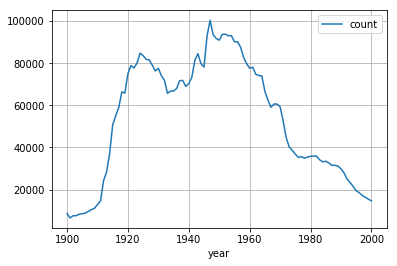

In [6]:
count_dynamic_change_names_by_years(['Ruth', 'Robert'], 1900, 2000)

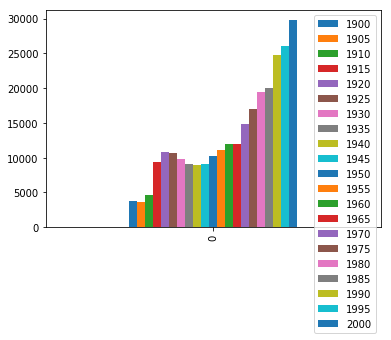

In [7]:
count_number_of_names_by_years(1900, 2000)

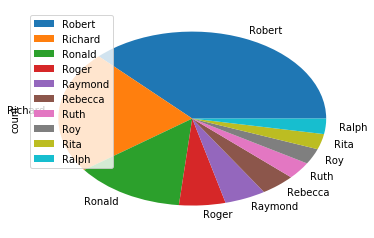

In [8]:
count_top10__names_by_year('R', 1950)

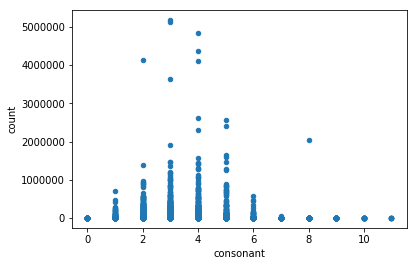

In [32]:
count_consonant()